In [1]:
#module import 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

In [2]:
def magnitude_to_components(vector_maginitude, angle):
    x_component = np.cos(angle)*vector_maginitude
    y_component = np.sin(angle)*vector_maginitude
    return x_component, y_component

def lift_coefficient():
    C_L = 1.0
    return C_L

def drag_coefficient():
    C_D = 0.3
    return C_D

def lift(C_L, rho, S, v_a, alpha):
    L = (C_L*rho*S*np.linalg.norm(v_a)**2)*np.sin(alpha)
    return L

def drag(C_D, rho, S, v_a, alpha):
    D = (C_D*rho*S*np.linalg.norm(v_a)**2)*np.cos(alpha)
    return D
    

def angle_of_atack(v_b, v_a):
    alpha = np.arccos(-(np.dot(v_a,v_b))/(np.linalg.norm(v_a)*np.linalg.norm(v_b)))
    return alpha 

def build_initial_conditions(initial_state, initial_mag_v_b, theta_b):
    x_0,y_0 = initial_state
    v_x_0, v_y_0 = magnitude_to_components(initial_mag_v_b, theta_b)

    return np.array([x_0, y_0, v_x_0, v_y_0])

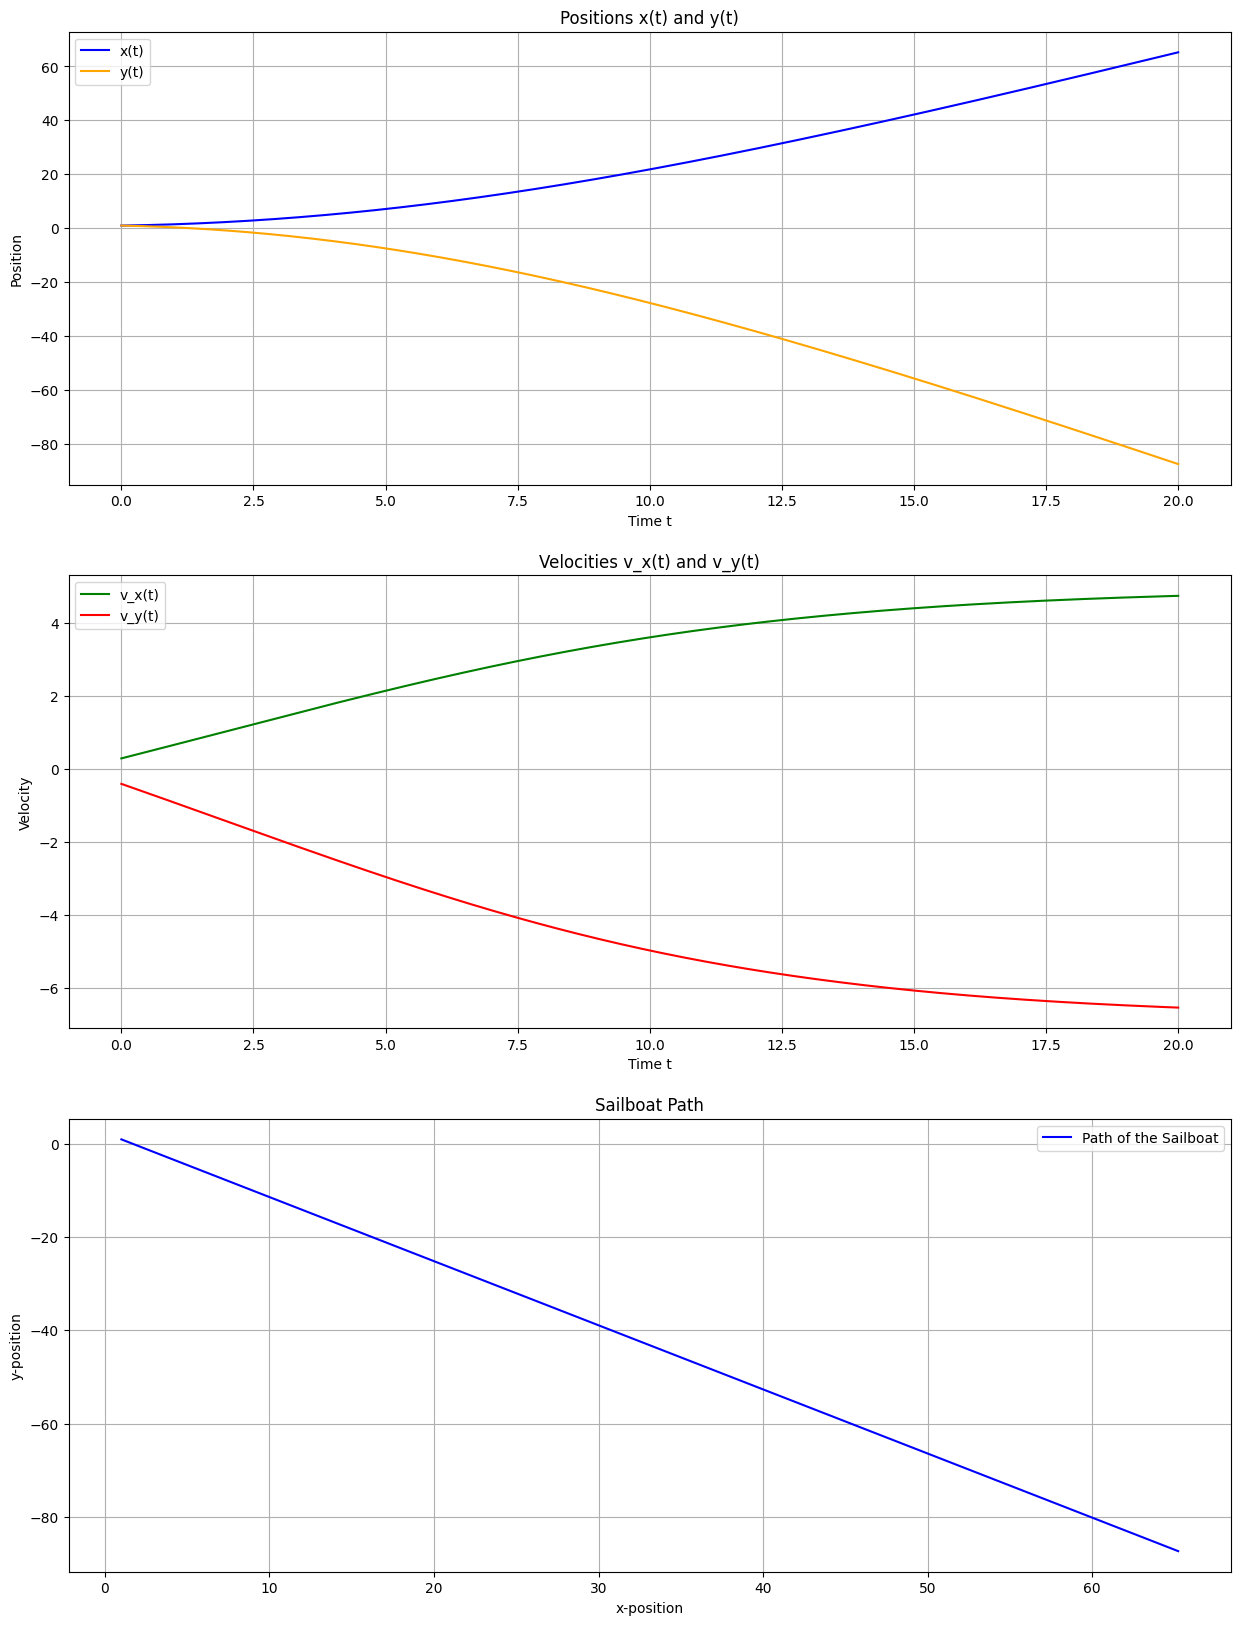

In [5]:
def system_ode(t, z, theta_b, theta_s, theta_w, mag_w_v_t, fixed_param):
    
    m_b, S, rho = fixed_param
    
    x, y, v_x, v_y = z

    v_t_x, v_t_y = magnitude_to_components(mag_w_v_t, theta_w)
    v_t = np.array([v_t_x, v_t_y])
    
    v_b = np.array([v_x, v_y])
    v_a = v_t - v_b
    
    alpha = angle_of_atack(v_b, v_a)
    
    C_L, C_D = lift_coefficient(), drag_coefficient()
    
    L = lift(C_L, rho, S, v_a, alpha)
    D = drag(C_D, rho, S, v_a, alpha)
    
    F = (L - D)/m_b
    
    F_x, F_y = magnitude_to_components(F, theta_b)      
    
    # Define the ODE system
    dx_dt = v_x
    dy_dt = v_y
    dv_x_dt = F_x
    dv_y_dt = F_y
    
    return [dx_dt, dy_dt, dv_x_dt, dv_y_dt]



# Boat initial conditions/parameters 
intitial_state = np.array([1., 1.])
theta_b = 1.7*np.pi
initial_mag_v_b = 0.5
m_b = 100

#sail params
theta_s = 1
S = 5 #size of sail

#Wind parameters
mag_w_v_t = 4 
theta_w_t = np.pi 


#Enivorment parameters
rho_a = 1.225

#fixed parameters
fixed_param = np.array([m_b, S, rho_a])

#intial state vector 
z_0 = build_initial_conditions(intitial_state, initial_mag_v_b, theta_b)

# Time parameters 
t_span = (0, 20)  
t_eval = np.linspace(t_span[0], t_span[1], 500)  


# Solve the ODE
solution = solve_ivp(system_ode, t_span, z_0, t_eval=t_eval, method='RK45', args=(theta_b, theta_s, theta_w_t, mag_w_v_t, fixed_param))

# Extract the solution
t = solution.t
x, y, v_x, v_y = solution.y


# Plot the results
plt.figure(figsize=(15, 20))

# Plot x and y 
plt.subplot(3, 1, 1)
plt.plot(t, x, label='x(t)', color='blue')
plt.plot(t, y, label='y(t)', color='orange')
plt.title('Positions x(t) and y(t)')
plt.xlabel('Time t')
plt.ylabel('Position')
plt.legend()
plt.grid()

# Plot vx and vy 
plt.subplot(3, 1, 2)
plt.plot(t, v_x, label='v_x(t)', color='green')
plt.plot(t, v_y, label='v_y(t)', color='red')
plt.title('Velocities v_x(t) and v_y(t)')
plt.xlabel('Time t')
plt.ylabel('Velocity')
plt.legend()
plt.grid()

# Plot the path of the sailboat
plt.subplot(3, 1, 3)
plt.plot(x, y, label='Path of the Sailboat', color='blue')
plt.title('Sailboat Path')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend()
plt.grid()
plt.show()